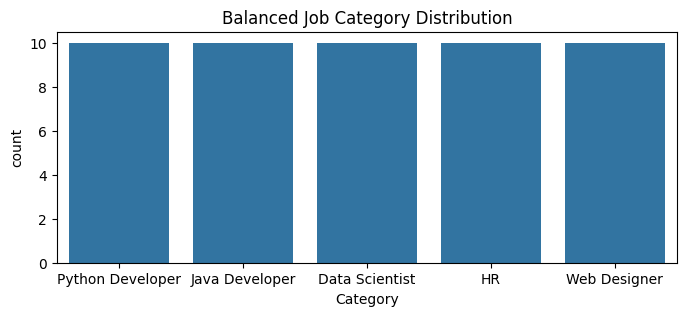

----------------------------------------
Accuracy: 0.80
----------------------------------------
                  precision    recall  f1-score   support

  Data Scientist       1.00      0.50      0.67         2
              HR       1.00      1.00      1.00         2
  Java Developer       0.67      1.00      0.80         2
Python Developer       0.67      1.00      0.80         2
    Web Designer       1.00      0.50      0.67         2

        accuracy                           0.80        10
       macro avg       0.87      0.80      0.79        10
    weighted avg       0.87      0.80      0.79        10

Test Resume: I am good at recruiting people and managing office payroll.
Predicted Job: HR


In [8]:
# --- Correct Resume Classifier (Fixed ValueError & Low Accuracy) ---

import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# 1. FIXED DATA: Increased size to 50 rows (10 per category)
# Ab train_test_split mein error nahi aayega.
data = {
    'Category': [
        'Python Developer']*10 + ['Java Developer']*10 + ['Data Scientist']*10 +
        ['HR']*10 + ['Web Designer']*10,
    'Resume': [
        # Python Developers
        "Expert in Python, Django, Flask, REST API development.", "Backend developer Python SQL Git Linux.",
        "Python scripting automation pandas numpy opencv.", "Developed web apps using Python FastAPI.",
        "Machine learning python backend engineer.", "Python developer with AWS experience.",
        "Django expert intermediate python developer.", "Software engineer python oops concepts.",
        "Data pipeline python developer sql.", "Api integration python developer flask.",

        # Java Developers
        "Experienced in Java Spring Boot Microservices.", "Core Java J2EE developer backend systems.",
        "Java developer Angular frontend integration.", "Spring MVC Hibernate MySQL Java developer.",
        "Enterprise java application developer.", "Java architect scalable systems concurrency.",
        "Android developer java kotlin mobile apps.", "Web services java soap rest developer.",
        "Backend engineer java spring cloud.", "Full stack java developer react js.",

        # Data Scientists
        "Data scientist python R statistics deep learning.", "Machine learning engineer tensorflow pytorch.",
        "NLP specialist data analysis python SQL.", "Data visualization expert tableau powerbi.",
        "Predictive modeling data mining scientist.", "AI researcher neural networks computer vision.",
        "Statistical analyst sas python regression.", "Big data analyst hadoop spark data science.",
        "Junior data scientist python cleaning data.", "Senior data scientist model deployment production.",

        # HR
        "HR manager recruitment onboarding payroll.", "Human resources talent acquisition specialist.",
        "Employee relations hr policies admin.", "HR recruiter campus hiring it staffing.",
        "Payroll management hr executive benefits.", "HR generalist performance appraisal training.",
        "Talent management hr business partner.", "Technical recruiter hr strategies sourcing.",
        "HR consultant organizational development.", "Assistant hr admin support documentation.",

        # Web Designers
        "Web designer html css javascript responsive.", "UI UX designer figma adobe xd prototyping.",
        "Frontend developer react js bootstrap design.", "Graphic designer web layout creative design.",
        "Wordpress developer theme customization php.", "Web visualizer css3 html5 animation effects.",
        "Mobile ui designer app interface web layout.", "Website maintenance html css updates.",
        "Creative web designer seo friendly pages.", "Interaction designer user experience wireframes."
    ]
}

df = pd.DataFrame(data)

# 2. Clean Text
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df['cleaned'] = df['Resume'].apply(clean_text)

# 3. Visualization
plt.figure(figsize=(8, 3))
sns.countplot(x=df['Category'])
plt.title('Balanced Job Category Distribution')
plt.show()

# 4. Train Test Split (Stratify will work now because test_size=10 >= classes=5)
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned'], df['Category'], test_size=0.2, random_state=42, stratify=df['Category']
)

# 5. Model Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

pipeline.fit(X_train, y_train)

# 6. Evaluation
y_pred = pipeline.predict(X_test)

print("-" * 40)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("-" * 40)
print(classification_report(y_test, y_pred))

# 7. Prediction Component
def predict_job(text):
    clean = clean_text(text)
    return pipeline.predict([clean])[0]

# Test
sample = "I am good at recruiting people and managing office payroll."
print(f"Test Resume: {sample}")
print(f"Predicted Job: {predict_job(sample)}")